In [2]:
#Imports

#Pandas: Reading and analyzing data
import pandas as pd
from utils.windowgenerator1 import *
from utils.modelgenerator import *

#Get data 
df = pd.read_csv('user5.csv')
df['Date'] = pd.to_datetime(df['Date'])

#Create datasets and windows
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1] #4


train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


C:\Users\rs1044\AppData\Local\Temp\ipykernel_24736\2574691479.py:24: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  train_df = (train_df - train_mean) / train_std
C:\Users\rs1044\AppData\Local\Temp\ipykernel_24736\2574691479.py:25: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  val_df = (val_df - train_mean) / train_std
C:\Users\rs1044\AppData\Local\Temp\ipykernel_24736\2574691479.py:26: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  test_df = (test_df - train_mean) / train_std


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Create sequences of length 49 for input and target
sequence_length = 49

def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length + 1):
        sequence = df.iloc[i:i+sequence_length, 1:]  # Exclude the 'Date' column
        sequences.append(sequence.values)
    return np.array(sequences)


train_sequences = create_sequences(train_df, sequence_length)
val_sequences = create_sequences(val_df, sequence_length)
test_sequences = create_sequences(test_df, sequence_length)



# Prepare data for LSTM model
def prepare_data(sequences):

    X = sequences[:, :-1, :].astype('float32') #For all sequences, Exclude last row of the sequence, take all columns
    y = sequences[:, -1, -1].astype('float32') #For all sequences, Take the last row of the sequence, take the last column
    return X, y

X_train, y_train = prepare_data(train_sequences)
X_val, y_val = prepare_data(val_sequences)
X_test, y_test = prepare_data(test_sequences)


In [4]:
# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])), #shape (48,3)
    tf.keras.layers.Dense(1) #Output 1 value
])

#model = tf.keras.Sequential([
#    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True), #shape (48,3)
#    tf.keras.layers.LSTM(64, return_sequences=True), #If True, retuns all sequences x with (x, 48,1) shape, if false only the (x,1)
#    tf.keras.layers.GlobalAveragePooling1D(),
#    tf.keras.layers.Dense(1) #Output 1 value
#])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/2
191/191 [==============================] - 3s 11ms/step - loss: 0.7288 - mae: 0.4541 - val_loss: 5.9777 - val_mae: 1.3441
Epoch 2/2
191/191 [==============================] - 2s 10ms/step - loss: 0.6757 - mae: 0.4210 - val_loss: 5.8977 - val_mae: 1.3268


In [5]:
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 4ms/step - loss: 8.1198 - mae: 1.5507


[8.119775772094727, 1.5506654977798462]

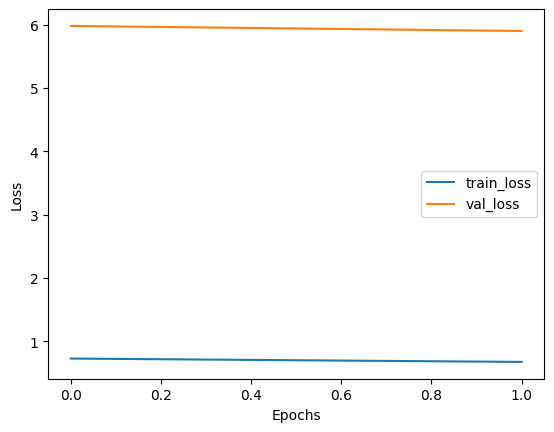

26/26 [==============================] - 0s 4ms/step


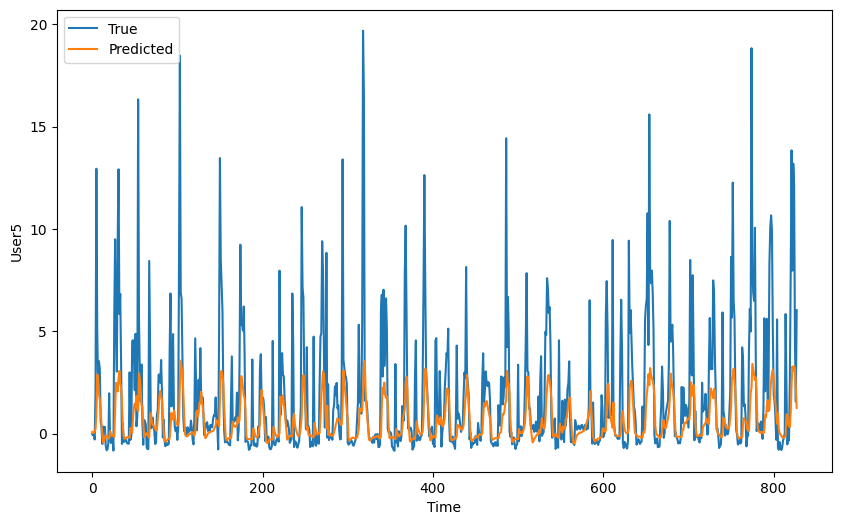

In [6]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot prediction results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('User5')
plt.legend()
plt.show()


In [7]:
# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot prediction results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('User5')
plt.legend()
plt.show()


Epoch 1/20
381/381 [==============================] - 4s 9ms/step - loss: 0.7131 - val_loss: 6.1357
Epoch 2/20
381/381 [==============================] - 3s 9ms/step - loss: 0.6754 - val_loss: 5.9227
Epoch 3/20
381/381 [==============================] - 3s 8ms/step - loss: 0.6646 - val_loss: 5.5174
Epoch 4/20
381/381 [==============================] - 3s 9ms/step - loss: 0.6561 - val_loss: 5.6091
Epoch 5/20
381/381 [==============================] - 3s 9ms/step - loss: 0.6457 - val_loss: 5.7274
Epoch 6/20
381/381 [==============================] - 3s 9ms/step - loss: 0.6400 - val_loss: 5.3993
Epoch 7/20
381/381 [==============================] - 3s 8ms/step - loss: 0.6342 - val_loss: 5.5910
Epoch 8/20
381/381 [==============================] - 3s 9ms/step - loss: 0.6267 - val_loss: 5.2464
Epoch 9/20
381/381 [==============================] - 3s 9ms/step - loss: 0.6228 - val_loss: 5.4442
Epoch 10/20
120/381 [========>.....................] - ETA: 2s - loss: 0.5675

KeyboardInterrupt: 

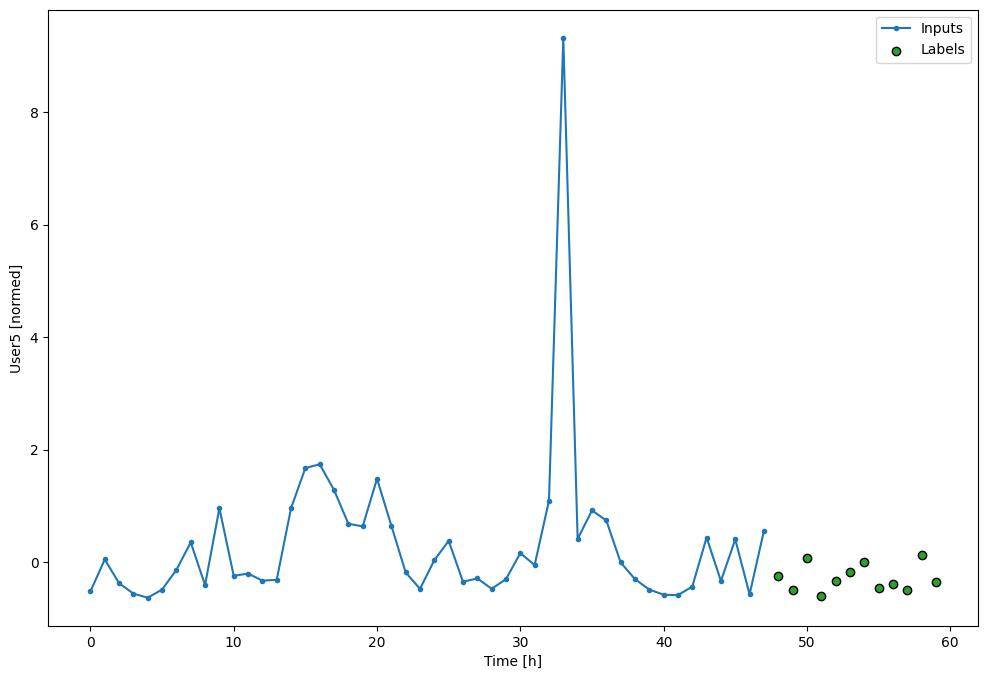

In [8]:
w1 = WindowGenerator(input_width=48, label_width=12, shift=12, train_df=train_df, val_df=val_df, test_df=test_df,label_columns=['User5'])

example_window = tf.stack(
    [
        np.array(train_df[100:100+w1.total_window_size]),
        #np.array(train_df[200:200+w1.total_window_size]),
        #np.array(train_df[300:300+w1.total_window_size])
    ]
)
example_inputs, example_labels = w1.split_window(example_window)

w1.example = example_inputs, example_labels

w1.plot(plot_col='User5', model=None)

In [10]:

#vocab_size = 20000  # Only consider the top 20k words
num_features = num_features
input_width = 48
num_tokens_per_example = num_features*input_width  # Only consider the first 200 words of each movie review

embed_dim = 1 #48*4  # Embedding size for each token.
num_heads = 2  # Number of attention heads
ff_dim = 12  # Hidden layer size in feedforward network.
num_experts = 10  # Number of experts used in the Switch Transformer.
batch_size = 1  # Batch size.
learning_rate = 0.001  # Learning rate.
dropout_rate = 0.25  # Dropout rate.
num_epochs = 3  # Number of epochs.

num_tokens_per_batch = ( #2400
    batch_size * num_tokens_per_example
)  # Total number of tokens per batch.

def create_feedforward_network(ff_dim, name=None):
    return keras.Sequential(
        [layers.Dense(ff_dim, activation="relu"), layers.Dense(ff_dim)], name=name
    )

def load_balanced_loss(router_probs, expert_mask):
    # router_probs [tokens_per_batch, num_experts] is the probability assigned for
    # each expert per token. expert_mask [tokens_per_batch, num_experts] contains
    # the expert with the highest router probability in one−hot format.

    num_experts = tf.shape(expert_mask)[-1]
    # Get the fraction of tokens routed to each expert.
    # density is a vector of length num experts that sums to 1.
    density = tf.reduce_mean(expert_mask, axis=0)
    # Get fraction of probability mass assigned to each expert from the router
    # across all tokens. density_proxy is a vector of length num experts that sums to 1.
    density_proxy = tf.reduce_mean(router_probs, axis=0)
    # Want both vectors to have uniform allocation (1/num experts) across all
    # num_expert elements. The two vectors will be pushed towards uniform allocation
    # when the dot product is minimized.
    loss = tf.reduce_mean(density_proxy * density) * tf.cast(
        (num_experts ** 2), tf.dtypes.float32
    )
    return loss

class Router(layers.Layer):
    def __init__(self, num_experts, expert_capacity):
        self.num_experts = num_experts
        self.route = layers.Dense(units=num_experts)
        self.expert_capacity = expert_capacity
        super().__init__()

    def call(self, inputs, training=False): 
        # inputs shape: [tokens_per_batch, embed_dim]
        # router_logits shape: [tokens_per_batch, num_experts]
        router_logits = self.route(inputs) #shape=(576, 10)

        if training: #shape=(576, 10)
            # Add noise for exploration across experts.
            router_logits += tf.random.uniform(
                shape=router_logits.shape, minval=0.9, maxval=1.1
            )
        
        # Probabilities for each token of what expert it should be sent to.
        router_probs = keras.activations.softmax(router_logits, axis=-1) #shape=(9600, 10)
        # Get the top−1 expert for each token. expert_gate is the top−1 probability
        # from the router for each token. expert_index is what expert each token
        # is going to be routed to.
        expert_gate, expert_index = tf.math.top_k(router_probs, k=1)
        # expert_mask shape: [tokens_per_batch, num_experts]
        expert_mask = tf.one_hot(expert_index, depth=self.num_experts) #shape=(9600, 1, 10)
        # Compute load balancing loss.
        aux_loss = load_balanced_loss(router_probs, expert_mask)
        self.add_loss(aux_loss)
        # Experts have a fixed capacity, ensure we do not exceed it. Construct
        # the batch indices, to each expert, with position in expert make sure that
        # not more that expert capacity examples can be routed to each expert.
        position_in_expert = tf.cast( #(9600, 1, 10)
            tf.math.cumsum(expert_mask, axis=0) * expert_mask, tf.dtypes.int32
        )
        # Keep only tokens that fit within expert capacity.
        expert_mask *= tf.cast(
            tf.math.less(
                tf.cast(position_in_expert, tf.dtypes.int32), self.expert_capacity
            ),
            tf.dtypes.float32,
        )
        expert_mask_flat = tf.reduce_sum(expert_mask, axis=-1)
        # Mask out the experts that have overflowed the expert capacity.
        expert_gate *= expert_mask_flat
        # Combine expert outputs and scaling with router probability.
        # combine_tensor shape: [tokens_per_batch, num_experts, expert_capacity]   
        combined_tensor = tf.expand_dims(
            expert_gate
            * expert_mask_flat
            * tf.squeeze(tf.one_hot(expert_index, depth=self.num_experts), 1),
            -1,
        ) * tf.squeeze(tf.one_hot(position_in_expert, depth=self.expert_capacity), 1) 
        # Create binary dispatch_tensor [tokens_per_batch, num_experts, expert_capacity]
        # that is 1 if the token gets routed to the corresponding expert.
        dispatch_tensor = tf.cast(combined_tensor, tf.dtypes.float32)

        return dispatch_tensor, combined_tensor #shape=(576, 10, 57) shape=(576, 10, 57)
    
class Switch(layers.Layer):
    def __init__(self, num_experts, ff_dim, num_tokens_per_batch, capacity_factor=1):
        self.num_experts = num_experts
        self.ff_dim = ff_dim
        self.experts = [
            create_feedforward_network(ff_dim) for _ in range(num_experts)
        ]

        self.expert_capacity = num_tokens_per_batch // self.num_experts
        self.router = Router(self.num_experts, self.expert_capacity)
        super().__init__()

    def call(self, inputs):
        
        batch_size = inputs.get_shape()[0] #3
        
        # inputs shape: [num_tokens_per_batch, embed_dim]
        inputs = tf.reshape(inputs,  [batch_size*num_tokens_per_example, 1])           
        # dispatch_tensor shape: [expert_capacity, num_experts, tokens_per_batch]
        # combine_tensor shape: [tokens_per_batch, num_experts, expert_capacity]
        dispatch_tensor, combine_tensor = self.router(inputs) #shape=(576, 10, 57)
                
        # expert_inputs shape: [num_experts, expert_capacity, embed_dim]
        expert_inputs = tf.einsum("ab,acd->cdb", inputs, dispatch_tensor)

        expert_inputs = tf.reshape(
            expert_inputs, [self.num_experts, self.expert_capacity, self.ff_dim]
        )
        # Dispatch to experts
        expert_input_list = tf.unstack(expert_inputs, axis=0)
        expert_output_list = [
            self.experts[idx](expert_input)
            for idx, expert_input in enumerate(expert_input_list)
        ]
        # expert_outputs shape: [expert_capacity, num_experts, embed_dim]
        expert_outputs = tf.stack(expert_output_list, axis=1)
        

        # expert_outputs_combined shape: [tokens_per_batch, embed_dim]
        expert_outputs_combined = tf.einsum(
            "abc,xba->xc", expert_outputs, combine_tensor
        )

        #outputs = expert_outputs_combined
        # output shape: [batch_size, num_tokens_per_example, embed_dim]
        outputs = tf.reshape(
            expert_outputs_combined,
            [batch_size, input_width, num_features],
        )

        return outputs
    
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ffn, dropout_rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=2, key_dim=4)
        # The ffn can be either a standard feedforward network or a switch
        # layer with a Mixture of Experts.
        self.ffn = ffn
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs) #shape(50,48,4)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) #shape=(50, 48, 4)

        ffn_output = self.ffn(out1) 
        ffn_output = self.dropout2(ffn_output, training=training) 
 
        return self.layernorm2(out1 + ffn_output) #shape=(3, 48, 4) shape=(3, 48, 4) shape=(3, 48, 4)
    
def create_switch_transformer():

    switch = Switch(num_experts, embed_dim, num_tokens_per_batch)
    transformer_block = TransformerBlock(ff_dim, num_heads, switch)
   
    inputs = keras.layers.Input(shape=(48,4), batch_size=batch_size) #shape=(3, 48, 4)
    
    x = transformer_block(inputs) #shape=(3, 48, 4)
    
    x = layers.GlobalAveragePooling1D()(x) #shape=(3, 4)
    
    x = layers.Dropout(dropout_rate)(x) #shape=(3, 4)

    #x = layers.Flatten()(x)
    x = layers.Dense(ff_dim, activation="relu")(x) #shape=(3, 12)

    x = layers.Dropout(dropout_rate)(x) #shape=(3, 12)

    outputs = layers.Dense(12, activation="softmax")(x) #shape=(3, 12)

    switch_transformer = keras.Model(inputs=inputs, outputs=outputs)
    return switch_transformer

In [5]:
w1.test

<_MapDataset element_spec=(TensorSpec(shape=(1, 48, 4), dtype=tf.float32, name=None), TensorSpec(shape=(1, 12, 1), dtype=tf.float32, name=None))>

In [11]:
def run_experiment(switch_transformer):
    switch_transformer.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.RootMeanSquaredError(), 
            tf.keras.metrics.MeanAbsolutePercentageError(),
            tf.keras.metrics.MeanAbsoluteError(),
        ]
        #optimizer=keras.optimizers.Adam(learning_rate),
        #metrics=[tf.keras.losses.MeanSquaredError()],
    )
    print("COMPILED")
    history = switch_transformer.fit(
        w1.train, batch_size=1, epochs=5, verbose=1,validation_data=w1.val, shuffle=False
        )
    return history


switch_transformer = create_switch_transformer()
run_experiment(switch_transformer)


COMPILED
Epoch 1/5
6073/6073 [==============================] - 16s 2ms/step - loss: 2.0094 - root_mean_squared_error: 1.0045 - mean_absolute_percentage_error: 495.1604 - mean_absolute_error: 0.6287 - val_loss: 10.3231 - val_root_mean_squared_error: 3.0553 - val_mean_absolute_percentage_error: 173.0738 - val_mean_absolute_error: 1.7832
Epoch 2/5
5826/6073 [===========================>..] - ETA: 0s - loss: 1.9385 - root_mean_squared_error: 0.9685 - mean_absolute_percentage_error: 508.9044 - mean_absolute_error: 0.6050

KeyboardInterrupt: 

In [6]:
val_performance = {}
performance = {}
val_performance['Switch'] = switch_transformer.evaluate(w1.val)
performance['Switch'] = switch_transformer.evaluate(w1.test)

817/817 [==============================] - 1s 1ms/step - loss: 13.1858 - root_mean_squared_error: 3.4909 - mean_absolute_percentage_error: 230.2096 - mean_absolute_error: 2.0175


In [15]:
df

,Date,temp,hour,User5
0,2012-07-01 00:00:00,5.1,0,0.098
1,2012-07-01 01:00:00,5.1,1,0.098
2,2012-07-01 02:00:00,5.1,2,0.075
3,2012-07-01 03:00:00,2.7,3,0.072
4,2012-07-01 04:00:00,2.7,4,0.092
...,...,...,...,...
8755,2013-06-30 19:00:00,11.8,19,2.152
8756,2013-06-30 20:00:00,11.8,20,1.993
8757,2013-06-30 21:00:00,8.8,21,0.814
8758,2013-06-30 22:00:00,8.8,22,0.390


In [37]:
s = w1.test.as_numpy_iterator()
s

817/817 [==============================] - 1s 1ms/step


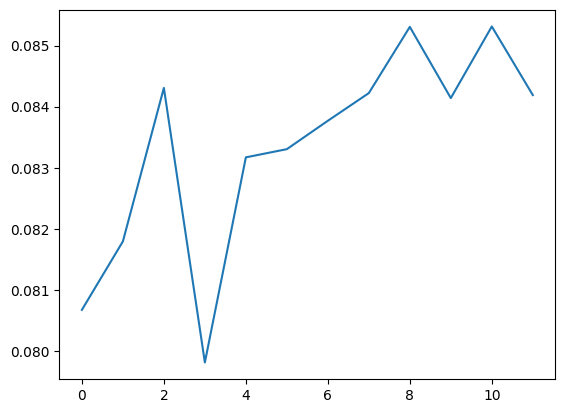

'# SCALED\n\nplt.figure(figsize=(12, 6))\n\n# Plot ground truth\nplt.plot(y_test[1500:], label=\'Ground Truth\')\n\n# Plot predictions from different experts\nplt.plot(y_preds[0][1500:], label="Switchtransformer")\n\n# Set plot title and axis labels\nplt.title(\'Comparison of Ground Truth and Expert Predictions\')\nplt.xlabel(\'Time\')\nplt.ylabel(\'Value\')\n\n# Add legend\nplt.legend()'

In [39]:
"""# Function to create sequences or window generator
def create_sequences(X, y, time_steps):
  Xs, ys = [] , []
  for i in range(len(X) - time_steps):
    Xs.append(X.iloc[i:i+time_steps].values)
    ys.append(y.iloc[i+time_steps])

  return np.array(Xs), np.array(ys)

y_preds = [] 
# Hyperparameters
TIME_STEPS = 48

# Split into input (X) and output (y) variables
X = df[['Date', 'temp', 'hour', 'User5']]
y = df['User5']

# Train test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



# Create sequences with a time window of 24
X_train, y_train = create_sequences(X_train, y_train, TIME_STEPS)
X_test, y_test = create_sequences(X_test, y_test, TIME_STEPS)"""

# make predictions
y_pred = switch_transformer.predict(w1.test)
plt.plot(y_pred[2])
plt.show()

"""# SCALED

plt.figure(figsize=(12, 6))

# Plot ground truth
plt.plot(y_test[1500:], label='Ground Truth')

# Plot predictions from different experts
plt.plot(y_preds[0][1500:], label="Switchtransformer")

# Set plot title and axis labels
plt.title('Comparison of Ground Truth and Expert Predictions')
plt.xlabel('Time')
plt.ylabel('Value')

# Add legend
plt.legend()"""

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

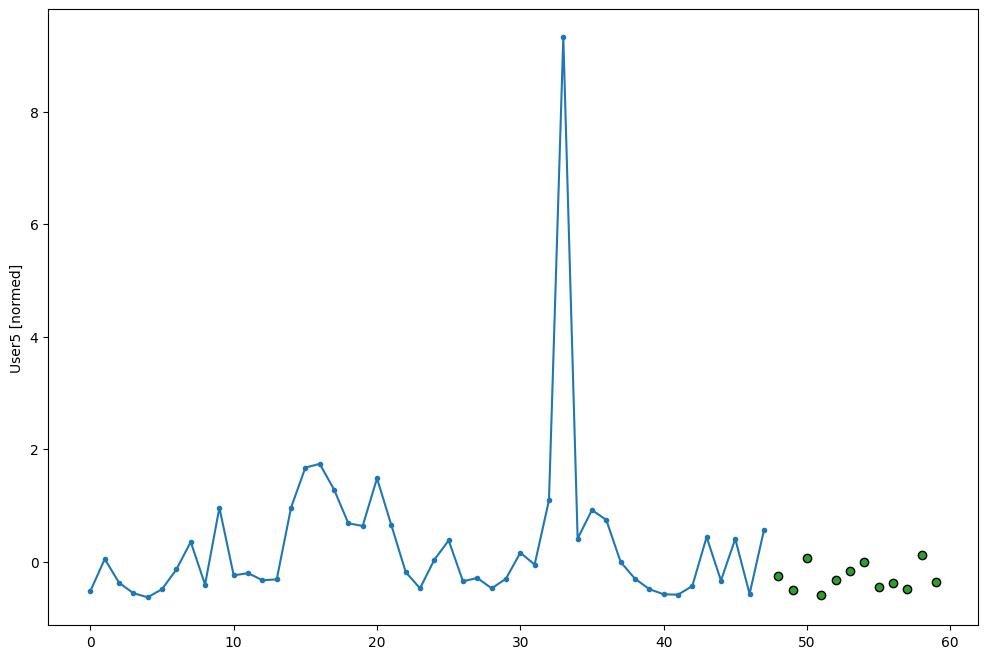

In [7]:
inputs, labels = w1.example

predictions = switch_transformer(inputs)

plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)

In [91]:
class Transformer_Model:
    @staticmethod
    def build(input_shape, output_steps, num_features, model_name):
        
        encoder_inputs = keras.layers.Input(shape=input_shape)
       
        #ENCODER
        #Encoder Layer 1
        x = keras.layers.MultiHeadAttention(key_dim=5, num_heads=2, dropout=0.2)(encoder_inputs, encoder_inputs)
        res1 = x + encoder_inputs #Add
        x = keras.layers.Dense(input_shape[1], activation='relu')(x) # Feed Forward Part
        res2 = x + res1 #Add
        x_out = keras.layers.LayerNormalization(epsilon=1e-6)(res2) #Norm


        #Encoder Layer 2
        x = keras.layers.MultiHeadAttention(key_dim=4, num_heads=2, dropout=0.2)(x_out, x_out)
        res1 = x + x_out #Add
        x = keras.layers.Dense(input_shape[1], activation='relu')(x) # Feed Forward Part
        res2 = x + res1 #Add
        x_out = keras.layers.LayerNormalization(epsilon=1e-6)(res2) #Norm

        encoder = keras.layers.LSTM(input_shape[1], return_state=True)
        encoder_outputs_and_states = encoder(x_out)
        encoder_states = encoder_outputs_and_states[1:]
        #-----------------------------------------------------------------------------------------
        decoder_inputs = encoder_inputs

        #DECODER
        #Decoder Layer 1
        x = keras.layers.MultiHeadAttention(key_dim=4, num_heads=2, dropout=0.2)(decoder_inputs, decoder_inputs)
        res1 = x + decoder_inputs #Add
        x = keras.layers.Dense(input_shape[1], activation='relu')(x) # Feed Forward Part
        res2 = x + res1 #Add
        x_out = keras.layers.LayerNormalization(epsilon=1e-6)(res2) #Norm

        decoder = keras.layers.LSTM(input_shape[1], return_state=True, return_sequences=True)
        decoder_outputs_and_states = decoder(x_out, initial_state=encoder_states)
        decoder_outputs = decoder_outputs_and_states[0] # Only select the output of the decoder (not the states)

        #Decoder Layer 2
        x = keras.layers.MultiHeadAttention(key_dim=4, num_heads=2, dropout=0.2)(decoder_outputs, x_out)
        res1 = x + decoder_outputs #Add
        x = keras.layers.Dense(input_shape[1], activation='relu')(x) # Feed Forward Part
        res2 = x + res1 #Add
        x_out = keras.layers.LayerNormalization(epsilon=1e-6)(res2) #Norm

        decoder = keras.layers.LSTM(input_shape[1], return_state=True, return_sequences=True)
        decoder_outputs_and_states = decoder(x_out, initial_state=encoder_states)
        decoder_outputs = decoder_outputs_and_states[0] # Only select the output of the decoder (not the states)

    
        
        #Feedforward
        x = keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
        x = keras.layers.Dense(output_steps*num_features, kernel_initializer=tf.initializers.zeros())(x)
        outputs = keras.layers.Reshape([output_steps, num_features])(x)

        return keras.models.Model(inputs=encoder_inputs, outputs=outputs, name=model_name) 

In [92]:
#Data Shape
OUT_STEPS = [12, 24] #Next 12 or 24 hours
NUM_FEATURES = [4] # [F_T, F_TW] load_value, hour sin, hour cos, dayofweek sin, dayofweek cos + (temp, rhum)
INPUT_STEPS = 48
INPUT_SHAPE = [(INPUT_STEPS, NUM_FEATURES[0])]
MAX_EPOCHS = 5

local_Transformer_model = Transformer_Model().build(
    input_shape = INPUT_SHAPE[0],
    output_steps = OUT_STEPS[0],
    num_features = NUM_FEATURES[0],
    model_name = "Tansformer_NAME"    
)


def compile_fit(local_model, window, MAX_EPOCHS):
    """
    Takes a model, compiles it, sets local weights, fits the model and retunrs new weights
    
    :param: model, local weights, the window to train and validate with
    :return: array of sclaed weights
    """
    #Compile Model (define loss, optimizer, metrics)
    local_model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.RootMeanSquaredError(), 
            tf.keras.metrics.MeanAbsolutePercentageError(),
            tf.keras.metrics.MeanAbsoluteError(),
        ]
    )
       
    #fit local model with client's data
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
    local_model.fit(
        window.train, 
        epochs=MAX_EPOCHS, 
        verbose=1, 
        validation_data=window.val,
        callbacks=[
            early_stopping, 
            #create_model_checkpoint(save_path=save_path), 
        ]
    )
      
    return local_model


#Compile and fit n rounds
local_Transformer_model = compile_fit(
    local_Transformer_model,
    w1,
    MAX_EPOCHS
)

Epoch 1/5
127/190 [===================>..........] - ETA: 1s - loss: 1.0587 - root_mean_squared_error: 1.0289 - mean_absolute_percentage_error: 1000.9896 - mean_absolute_error: 0.5994

KeyboardInterrupt: 

In [6]:

#feedback_model.compile(loss=tf.keras.losses.MeanSquaredError(),
#                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = multi_ffnn_model.fit(w1.train, epochs=5, validation_data=w1.val, batch_size=50)
history_cnn = multi_cnn_model.fit(w1.train, epochs=5, validation_data=w1.val, batch_size=50)
history_lstm = multi_lstm_model.fit(w1.train, epochs=5, validation_data=w1.val, batch_size=50)
#history_AR_lstm = feedback_model.fit(w1.train, epochs=5, validation_data=w1.val)


val_performance = {}
performance = {}
val_performance['Linear'] = multi_ffnn_model.evaluate(w1.val, batch_size=50)
performance['Linear'] = multi_ffnn_model.evaluate(w1.test, verbose=0, batch_size=50)
val_performance['CNN'] = multi_cnn_model.evaluate(w1.val, batch_size=50)
performance['CNN'] = multi_cnn_model.evaluate(w1.test, verbose=0, batch_size=50)
val_performance['LSTM'] = multi_lstm_model.evaluate(w1.val, batch_size=50)
performance['LSTM'] = multi_lstm_model.evaluate(w1.test, verbose=0, batch_size=50)
#val_performance['ARLSTM'] = multi_lstm_model.evaluate(w1.val)
#performance['ARLSTM'] = multi_lstm_model.evaluate(w1.test, verbose=0)

<_BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
<_BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
Epoch 1/5
122/122 [==============================] - 1s 5ms/step - loss: 0.9143 - mean_absolute_error: 0.5588 - val_loss: 9.2124 - val_mean_absolute_error: 1.7686
Epoch 2/5
122/122 [==============================] - 0s 1ms/step - loss: 0.9103 - mean_absolute_error: 0.5565 - val_loss: 9.2571 - val_mean_absolute_error: 1.7774
Epoch 3/5
122/122 [==============================] - 0s 1ms/step - loss: 0.9070 - mean_absolute_error: 0.5546 - val_loss: 9.3047 - val_mean_absolute_error: 1.7868
Epoch 4/5
122/122 [==============================] - 0s 1ms/step - loss: 0.9042 - mean_absolute_error: 0.5531 - val_loss: 9.3529 - val_mean_absolute_error: 1.7964
Epoch 5/5
122/122 [==============================] - 0s 1ms/step - loss: 0.9019 - mean_absolute_error: 0.5518 - val_loss: 9.4001 - val_mean_absolute_error: 1.8060
<

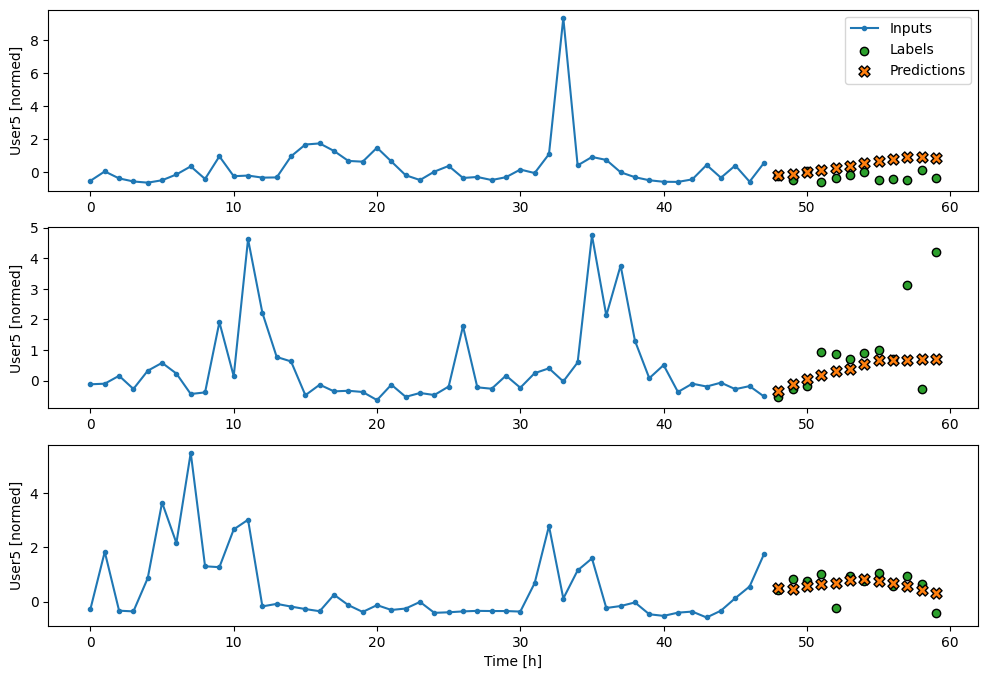

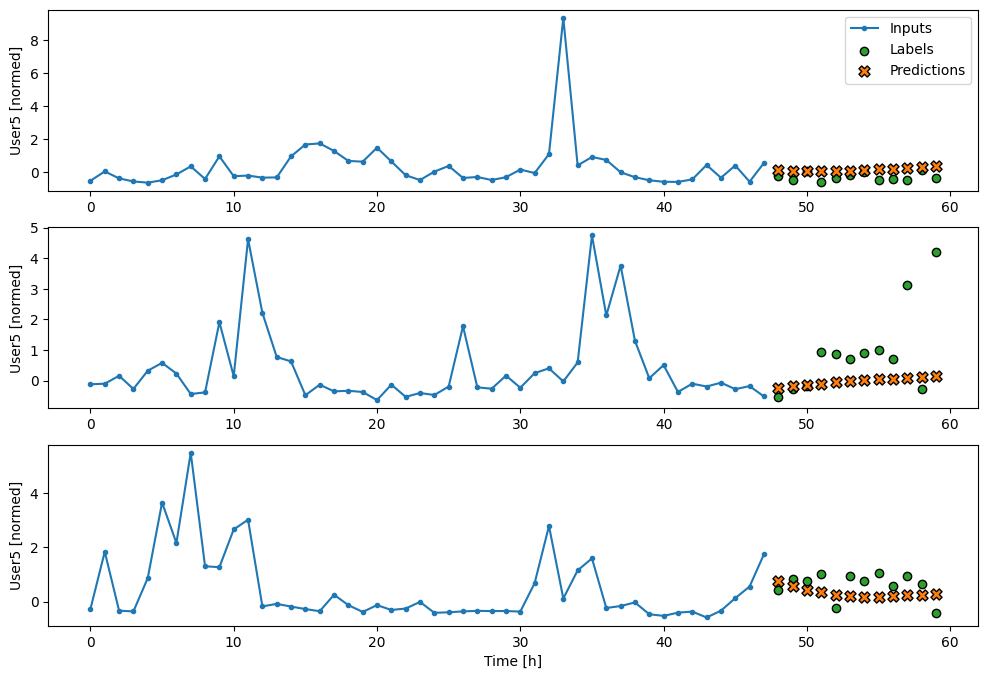

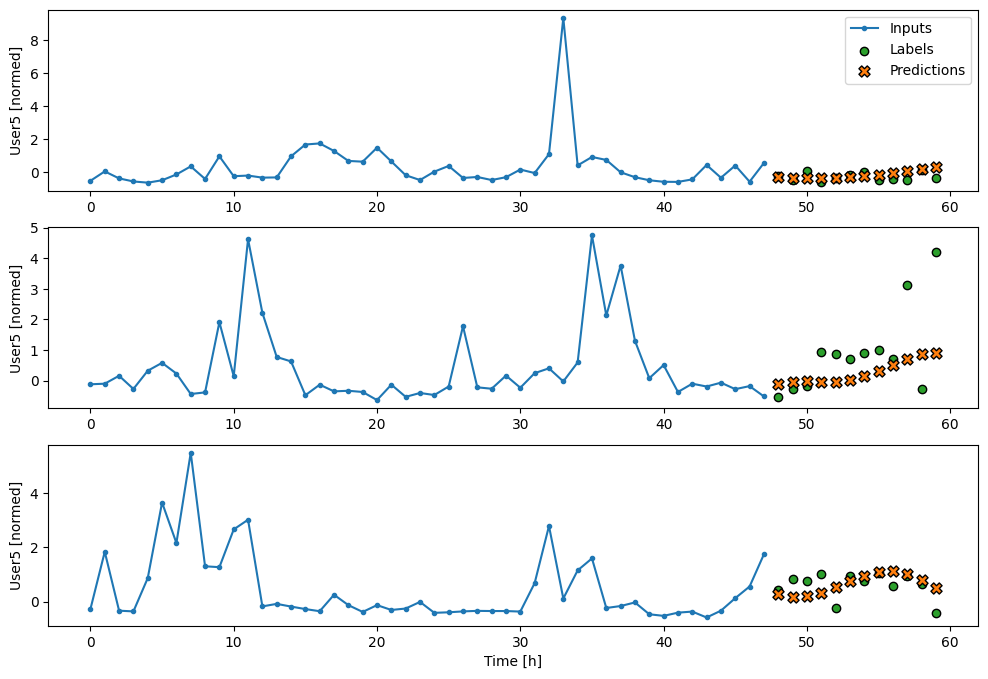

In [7]:
w1.plot(plot_col='User5', model=multi_cnn_model)
w1.plot(plot_col='User5', model=multi_ffnn_model)
w1.plot(plot_col='User5', model=multi_lstm_model)

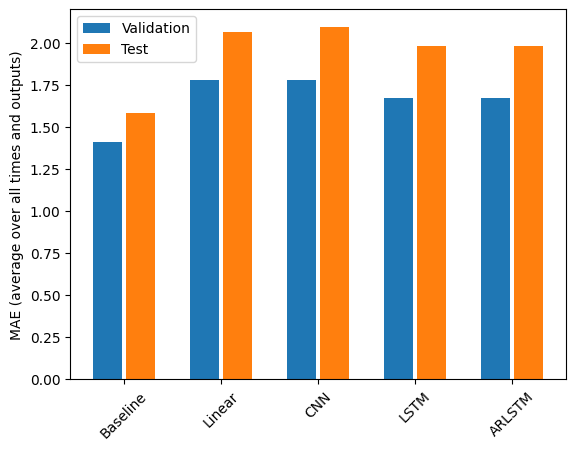

In [69]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()